# Movie Project


### Github repo:

https://github.com/akharina/dc-ds_movie_project.git


### Data directory:

    data/final : cleaned dataset
    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
#Import main dataframe 

df = pd.read_csv('data/final/movie_dataset_df.csv.gz', compression='gzip')
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45519 entries, 0 to 45518
Data columns (total 33 columns):
adult                45519 non-null bool
budget               45519 non-null int64
id                   45519 non-null int64
imdb_id              45519 non-null object
original_language    45508 non-null object
original_title       45519 non-null object
overview             44567 non-null object
popularity           45519 non-null float64
date                 45519 non-null datetime64[ns]
revenue              45519 non-null float64
runtime              45264 non-null float64
status               45438 non-null object
tagline              20435 non-null object
title                45519 non-null object
video                45519 non-null bool
vote_avg             45519 non-null float64
vote_count           45519 non-null float64
cast                 45518 non-null object
crew                 45518 non-null object
WEEK                 45519 non-null int64
MONTH                4551

### Profit Metric

$\frac{(REVENUE - BUDGET)}{BUDGET} \times \frac{REVENUE}{BUDGET} $

In [53]:
#df['PROFIT'] = ((df['REVENUE_MIL'] - df['BUDGET_MIL'])* df['REVENUE_MIL'])/(df['BUDGET_MIL']**2)
# df['PROFIT'] = df['PROFIT']/10**14

df['PROFIT'] = (df['REVENUE_MIL']-df['BUDGET_MIL'])/df['BUDGET_MIL']

df['PROFIT'].describe()

count    4.551900e+04
mean    -2.605700e+00
std      7.755773e+04
min     -1.000001e+06
25%     -5.000000e-01
50%     -5.000000e-01
75%     -5.000000e-01
max      1.239638e+07
Name: PROFIT, dtype: float64

In [55]:
df.loc[(df['BUDGET_MIL'] > 1) & (df['REVENUE_MIL'] > 1) & (df['PROFIT'] > 0) & (df['PROFIT'] > 100),('original_title',"WEEK","YEAR","PROFIT")]

,original_title,WEEK,YEAR,PROFIT
587,Snow White and the Seven Dwarfs,51,1937,123.242561
1006,Alice in Wonderland,27,1951,189.666667


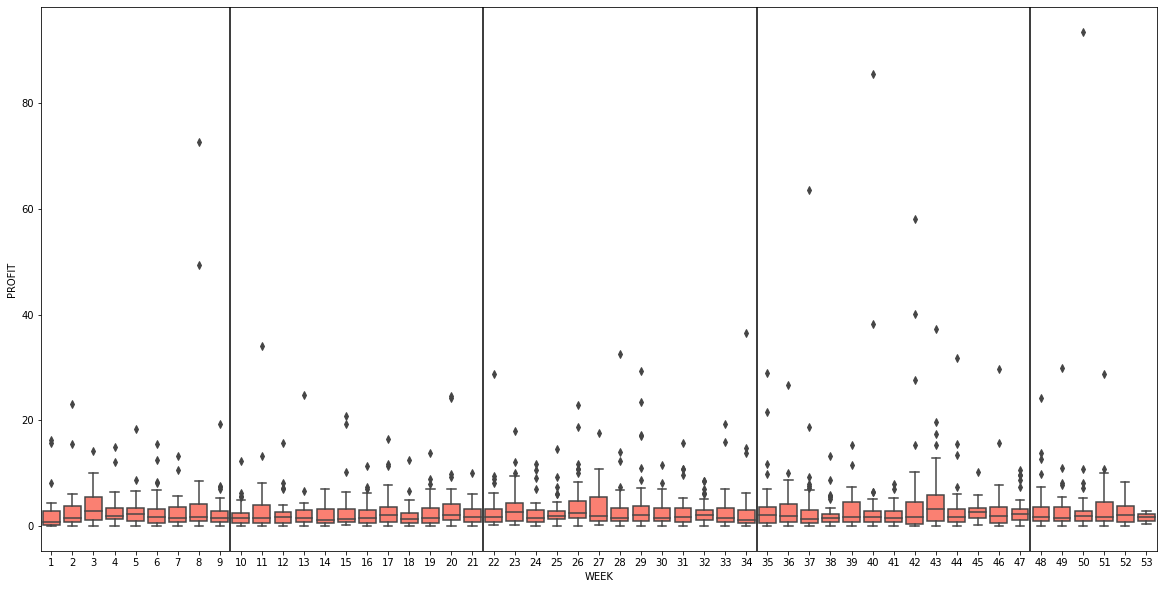

In [74]:
#Week of year vs profit

dftemp = df.loc[(df['BUDGET_MIL'] > 1) & (df['REVENUE_MIL'] > 1) & (df['PROFIT'] > 0)  & (df['YEAR'] > 2000)]

plt.figure(figsize=(20,10))

bplot = sns.boxplot(x="WEEK", y="PROFIT", data=dftemp )

# Annotation
plt.axvline(8.5, color='k') #Start of spring
plt.axvline(20.5, color='k') #Start of summer
plt.axvline(33.5, color='k') #Start of fall
plt.axvline(46.5, color='k') #Start of winter

#Colors
for i in range(0,53):
    mybox = bplot.artists[i]
    mybox.set_facecolor("salmon")

plt.show()

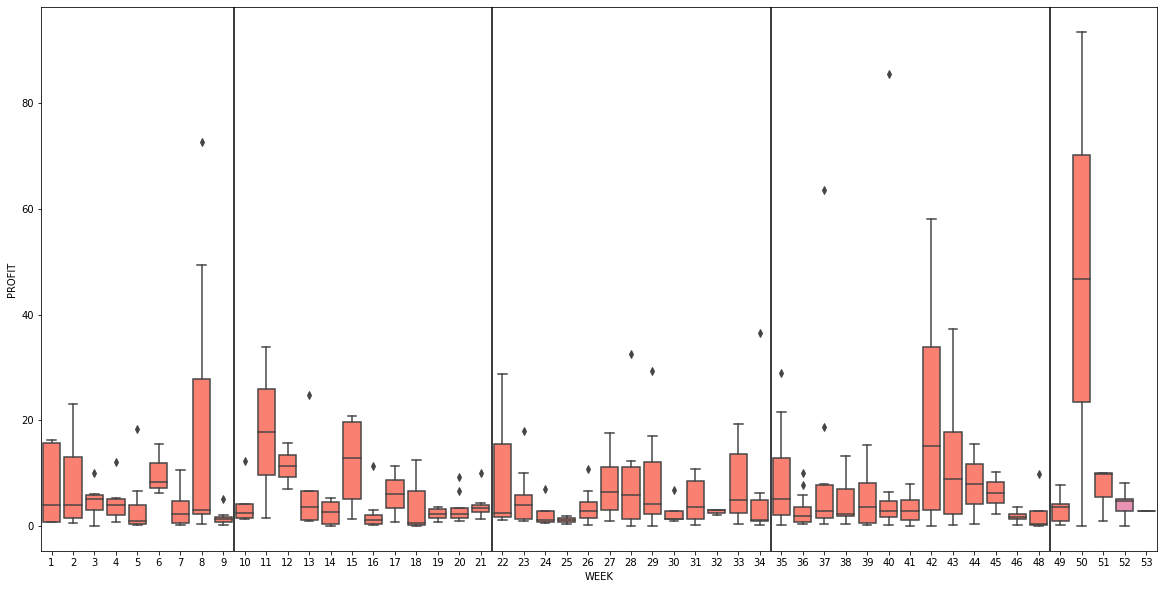

In [79]:
#Week of year vs profit, zoom in: small budget - between 1 and 6 million dollars

dftemp = df.loc[(df['BUDGET_MIL'] > 1) & (df['BUDGET_MIL'] < 6) & (df['REVENUE_MIL'] > 1) & (df['PROFIT'] > 0)  & (df['YEAR'] > 2000)]
plt.figure(figsize=(20,10))

bplot = sns.boxplot(x="WEEK", y="PROFIT", data=dftemp )


# Annotations
plt.axvline(8.5, color='k') #Start of spring
plt.axvline(20.5, color='k') #Start of summer
plt.axvline(33.5, color='k') #Start of fall
plt.axvline(46.5, color='k') #Start of winter

#Colors
for i in range(0,50):
    mybox = bplot.artists[i]
    mybox.set_facecolor("salmon")

plt.show()

In [103]:
df['original_language'].value_counts().head()

en    32301
fr     2442
it     1529
ja     1354
de     1083
Name: original_language, dtype: int64

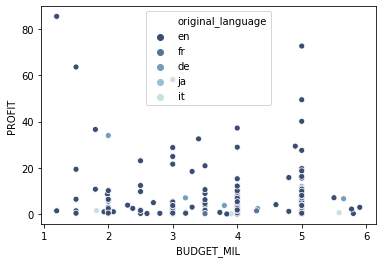

In [102]:
# df_lang = df.loc[(df['original_language'] == 'en') | (df['original_language'] == 'fr')| (df['original_language'] == 'es')]
df_lang = df.loc[(df['original_language'].isin(['en','fr','it','ja','de']))]
                  
dftemp = df_lang.loc[(df['BUDGET_MIL'] > 1) & (df['BUDGET_MIL'] < 6) & (df['REVENUE_MIL'] > 1) & (df['PROFIT'] > 0)  & (df['YEAR'] > 2000)]


sns.scatterplot(x="BUDGET_MIL", y="PROFIT",
                data = dftemp, hue="original_language",
                palette="ch:r=-.2,d=.3_r");



In [101]:
dftemp.groupby('original_language').mean()

,adult,budget,id,popularity,revenue,runtime,video,vote_avg,vote_count,WEEK,YEAR,BUDGET_MIL,REVENUE_MIL,PROFIT
original_language,,,,,,,,,,,,,,
de,True,4.109224e+06,66210.857143,8.415325,3.831440e+07,117.714286,False,7.057143,343.571429,21.000000,2008.857143,4.109224,38.314403,10.253938
en,True,3.637311e+06,122842.966216,9.591800,3.343604e+07,98.702703,False,6.210135,605.662162,25.587838,2010.020270,3.637311,33.436041,8.448994
fr,True,3.960000e+06,173479.000000,7.415005,1.550986e+07,129.000000,False,6.700000,396.400000,28.800000,2010.800000,3.960000,15.509865,2.914065
it,True,4.060662e+06,116527.200000,3.892996,1.796347e+07,79.000000,False,6.080000,135.600000,29.800000,2010.600000,4.060662,17.963473,3.577892
ja,True,5.000000e+06,158176.500000,7.815738,3.455359e+07,111.000000,False,7.150000,236.000000,30.000000,2008.500000,5.000000,34.553589,5.910718


In [ ]:
dftemp = df.loc[(df['BUDGET_MIL'] > 1) & (df['BUDGET_MIL'] < 6) & (df['REVENUE_MIL'] > 1) & (df['PROFIT'] > 0)  & (df['YEAR'] > 2000)]
plt.figure(figsize=(20,10))

